#Project: Predicting House Prices (Works as a group of 3)

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv(r'/content/drive/MyDrive/DEEP LEARNING/AmesHousing.csv')

In [5]:
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [6]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Lot Frontage       490
Alley             2732
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64


In [10]:
# Impute missing numerical values with the mean
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Impute missing categorical values with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Display the first few rows of the DataFrame after handling missing values
print(df.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0  Grvl       IR1          Lvl  ...         0      Ex  MnPrv         Shed   
1  Grvl       Reg          Lvl  ...         0      Ex  MnPrv         Shed   
2  Grvl       IR1          Lvl  ...         0      Ex  MnPrv         Gar2   
3  Grvl       Reg          Lvl  ...         0      Ex  MnPrv         Shed   
4  Grvl       IR1          Lvl  ...         0      Ex  MnPrv         Shed   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [11]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


In [12]:
import numpy as np

# Define a function to detect and handle outliers using z-score
def handle_outliers_zscore(df, threshold=3):
    # Calculate z-scores for numerical columns
    z_scores = df.select_dtypes(include=['int64', 'float64']).apply(lambda x: np.abs((x - x.mean()) / x.std()))

    # Replace values that are greater than the threshold
    df_cleaned = df.mask(z_scores > threshold)

    return df_cleaned

# Apply outlier handling function to the DataFrame
df_cleaned = handle_outliers_zscore(df)

# Display the first few rows of the cleaned DataFrame
print(df_cleaned.head())


   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100         20.0       NaN           NaN   31770.0    NaN   
1      2  526350040         20.0       NaN          80.0   11622.0    NaN   
2      3  526351010         20.0       NaN          81.0   14267.0    NaN   
3      4  526353030         20.0       NaN          93.0   11160.0    NaN   
4      5  527105010         60.0       NaN          74.0   13830.0    NaN   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
0   NaN       NaN          NaN  ...       0.0     NaN   NaN          NaN   
1   NaN       NaN          NaN  ...       0.0     NaN   NaN          NaN   
2   NaN       NaN          NaN  ...       0.0     NaN   NaN          NaN   
3   NaN       NaN          NaN  ...       0.0     NaN   NaN          NaN   
4   NaN       NaN          NaN  ...       0.0     NaN   NaN          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0      0.0    

In [14]:
# Display the list of columns in your DataFrame
print(df.columns)


Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [17]:
# Perform one-hot encoding using pandas.get_dummies()
df_encoded = pd.get_dummies(df, columns=['MS Zoning', 'Street', 'Alley', 'Land Contour', 'Utilities',
                                         'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2',
                                         'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
                                         'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation',
                                         'Heating', 'Central Air', 'Electrical', 'Garage Type',
                                         'Misc Feature', 'Sale Type', 'Sale Condition'])

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())


   Order        PID  MS SubClass  Lot Frontage  Lot Area Lot Shape Land Slope  \
0      1  526301100           20         141.0     31770       IR1        Gtl   
1      2  526350040           20          80.0     11622       Reg        Gtl   
2      3  526351010           20          81.0     14267       IR1        Gtl   
3      4  526353030           20          93.0     11160       Reg        Gtl   
4      5  527105010           60          74.0     13830       IR1        Gtl   

   Overall Qual  Overall Cond  Year Built  ...  Sale Type_New  Sale Type_Oth  \
0             6             5        1960  ...              0              0   
1             5             6        1961  ...              0              0   
2             6             6        1958  ...              0              0   
3             7             5        1968  ...              0              0   
4             5             5        1997  ...              0              0   

  Sale Type_VWD Sale Type_WD  Sa

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to each categorical feature
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Display the first few rows of the DataFrame after label encoding
print(df.head())


   Order        PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0      1  526301100           20          5         141.0     31770       1   
1      2  526350040           20          4          80.0     11622       1   
2      3  526351010           20          5          81.0     14267       1   
3      4  526353030           20          5          93.0     11160       1   
4      5  527105010           60          5          74.0     13830       1   

   Alley  Lot Shape  Land Contour  ...  Pool Area  Pool QC  Fence  \
0      0          0             3  ...          0        0      2   
1      0          3             3  ...          0        0      2   
2      0          0             3  ...          0        0      2   
3      0          3             3  ...          0        0      2   
4      0          0             3  ...          0        0      2   

   Misc Feature  Misc Val  Mo Sold  Yr Sold  Sale Type  Sale Condition  \
0             3         0        5  

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler object
scaler = MinMaxScaler()

# Apply normalization to numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows of the DataFrame after normalization
print(df.head())


      Order       PID  MS SubClass  MS Zoning  Lot Frontage  Lot Area  Street  \
0  0.000000  0.000000     0.000000   0.833333      0.410959  0.142420     1.0   
1  0.000341  0.000102     0.000000   0.666667      0.202055  0.048246     1.0   
2  0.000683  0.000104     0.000000   0.833333      0.205479  0.060609     1.0   
3  0.001024  0.000108     0.000000   0.833333      0.246575  0.046087     1.0   
4  0.001366  0.001672     0.235294   0.833333      0.181507  0.058566     1.0   

   Alley  Lot Shape  Land Contour  ...  Pool Area  Pool QC     Fence  \
0    0.0        0.0           1.0  ...        0.0      0.0  0.666667   
1    0.0        1.0           1.0  ...        0.0      0.0  0.666667   
2    0.0        0.0           1.0  ...        0.0      0.0  0.666667   
3    0.0        1.0           1.0  ...        0.0      0.0  0.666667   
4    0.0        0.0           1.0  ...        0.0      0.0  0.666667   

   Misc Feature  Misc Val   Mo Sold  Yr Sold  Sale Type  Sale Condition  \
0    

In [20]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0.000000,0.000000,0.000000,0.833333,0.410959,0.142420,1.0,0.0,0.0,1.0,...,0.0,0.0,0.666667,0.75,0.000000,0.363636,1.0,1.0,0.8,0.272444
1,0.000341,0.000102,0.000000,0.666667,0.202055,0.048246,1.0,0.0,1.0,1.0,...,0.0,0.0,0.666667,0.75,0.000000,0.454545,1.0,1.0,0.8,0.124238
2,0.000683,0.000104,0.000000,0.833333,0.205479,0.060609,1.0,0.0,0.0,1.0,...,0.0,0.0,0.666667,0.25,0.735294,0.454545,1.0,1.0,0.8,0.214509
3,0.001024,0.000108,0.000000,0.833333,0.246575,0.046087,1.0,0.0,1.0,1.0,...,0.0,0.0,0.666667,0.75,0.000000,0.272727,1.0,1.0,0.8,0.311517
4,0.001366,0.001672,0.235294,0.833333,0.181507,0.058566,1.0,0.0,0.0,1.0,...,0.0,0.0,0.666667,0.75,0.000000,0.181818,1.0,1.0,0.8,0.238626


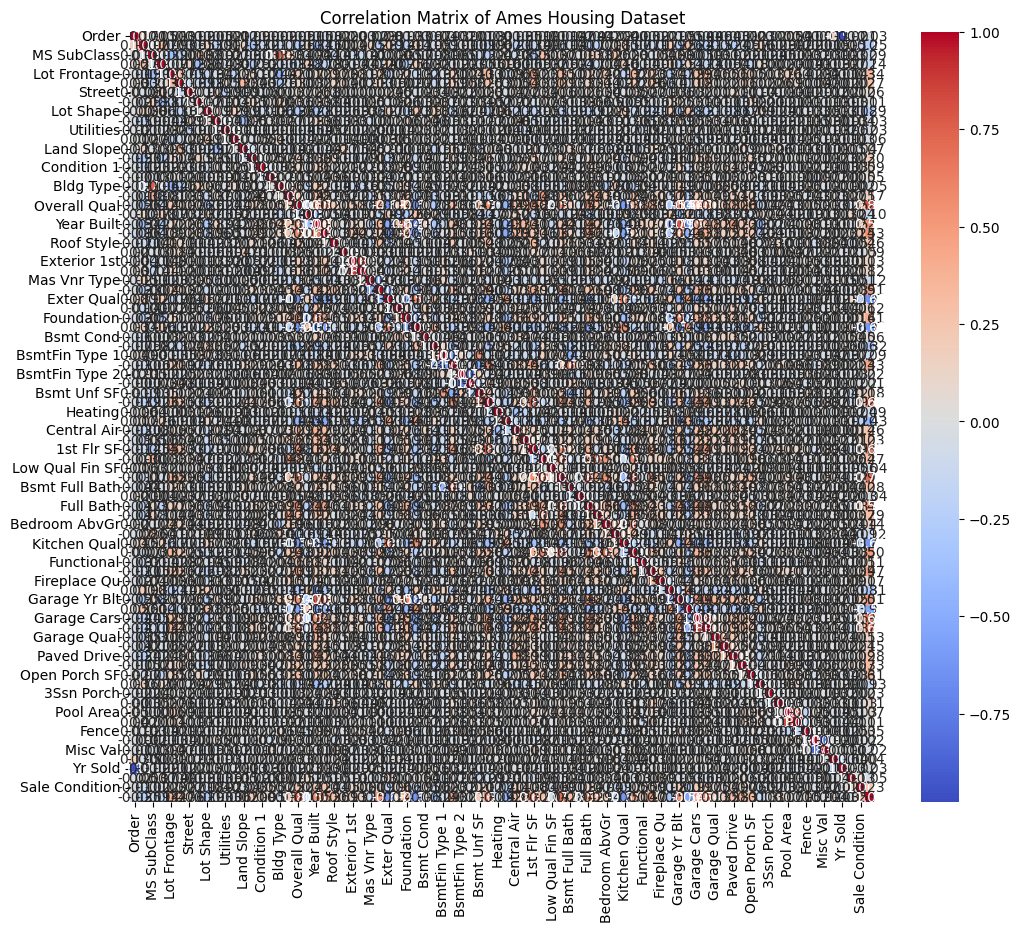

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Ames Housing Dataset')
plt.show()


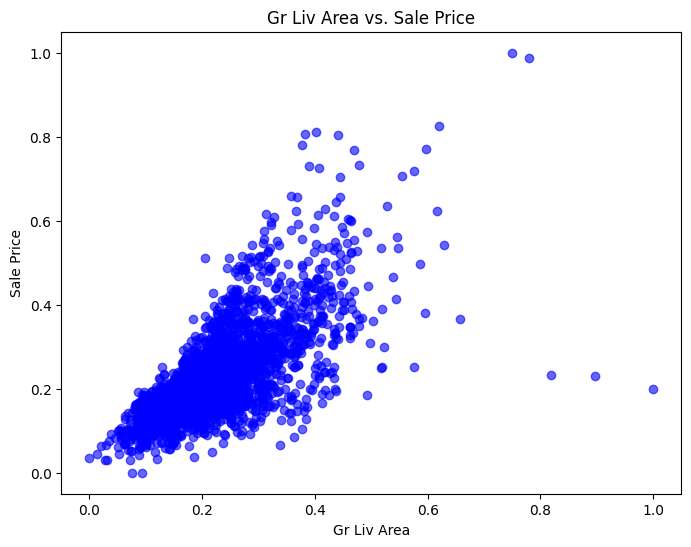

In [22]:
# Scatter plot of 'Gr Liv Area' vs. 'SalePrice'
plt.figure(figsize=(8, 6))
plt.scatter(df['Gr Liv Area'], df['SalePrice'], alpha=0.6, color='blue')
plt.title('Gr Liv Area vs. Sale Price')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.show()




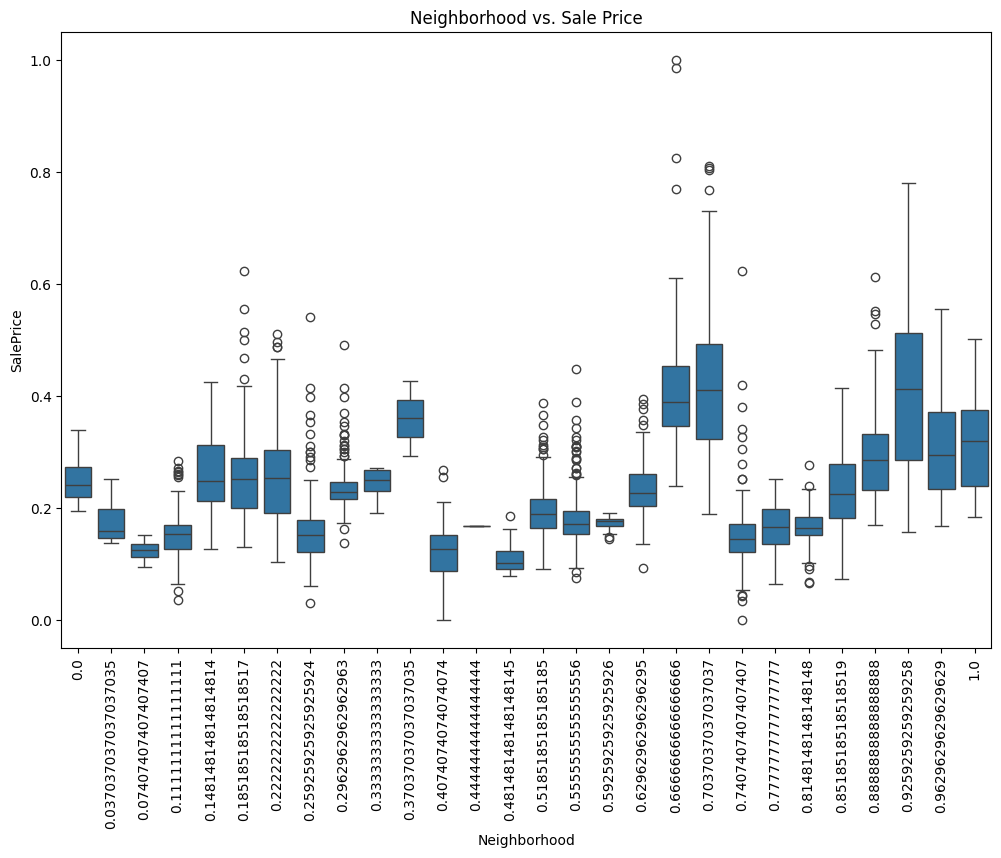

In [23]:
# Box plot of 'Neighborhood' vs. 'SalePrice'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title('Neighborhood vs. Sale Price')
plt.xticks(rotation=90)
plt.show()

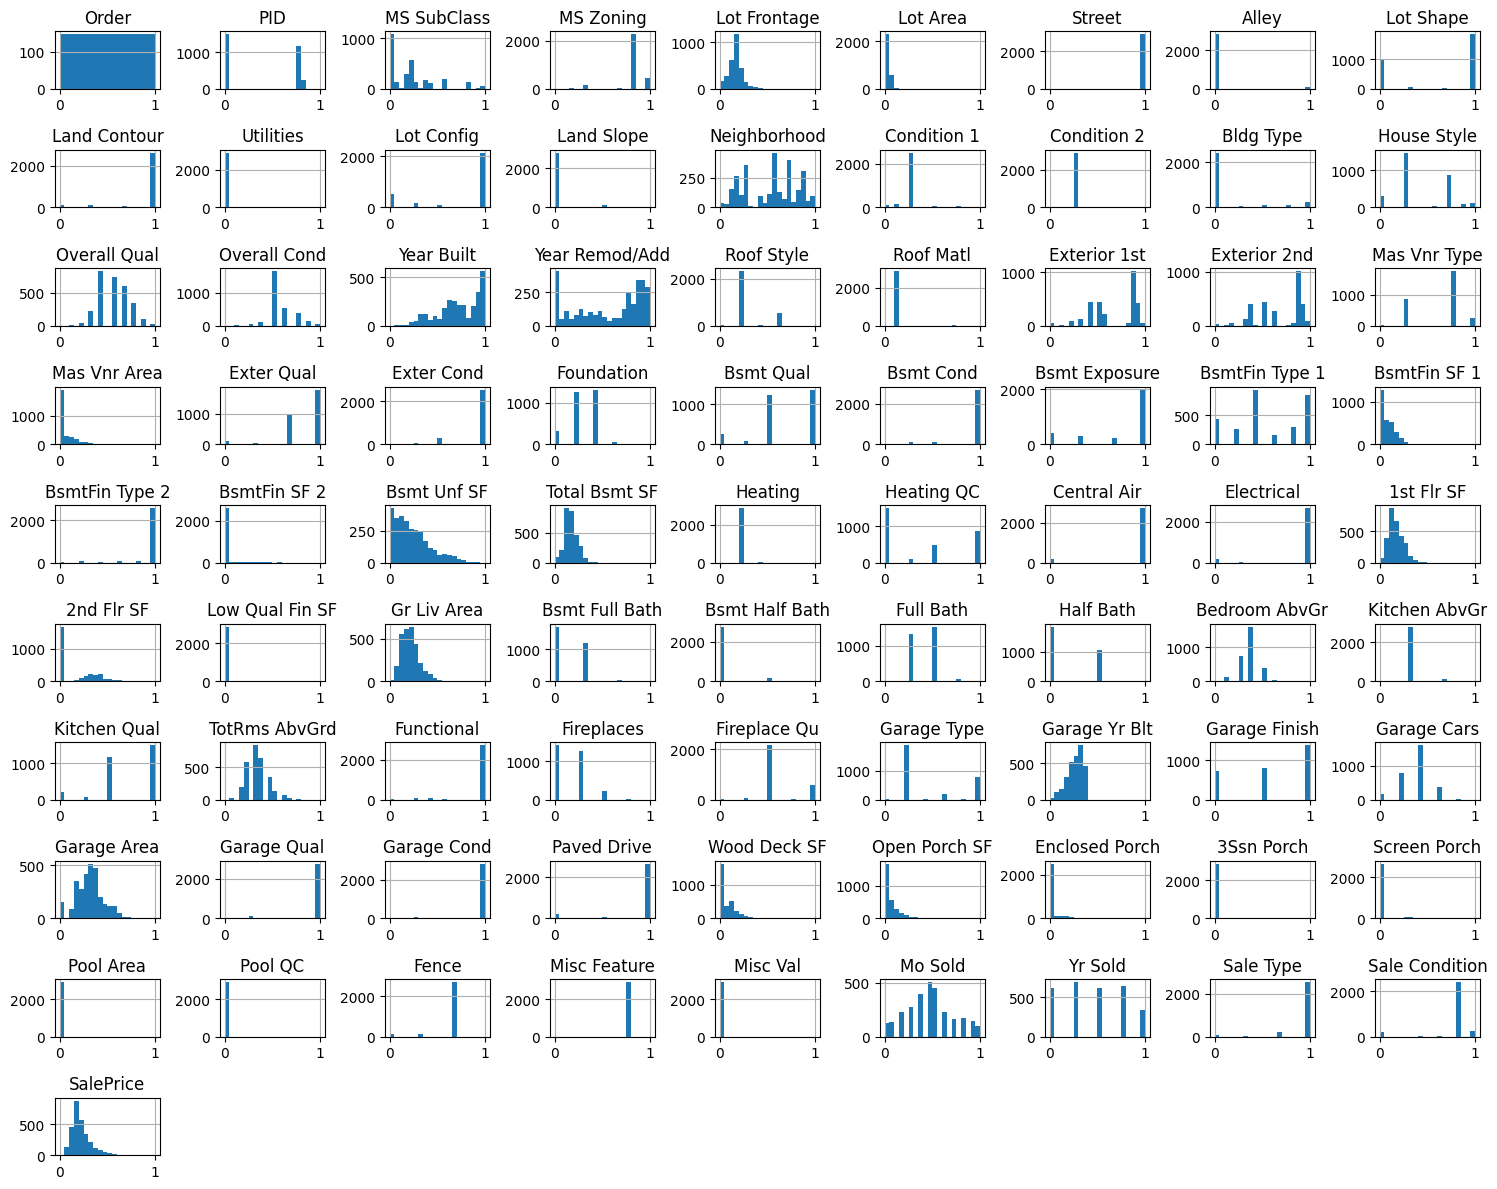

In [24]:
import matplotlib.pyplot as plt

# Plot histograms of numerical features
df.hist(figsize=(15, 12), bins=20)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training (70%) and temporary set (30%)
X_train, X_temp, y_train, y_temp = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.3, random_state=42)

# Split the temporary set into validation (50%) and testing sets (50%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting sets
print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (2051, 81) (2051,)
Validation set: (439, 81) (439,)
Testing set: (440, 81) (440,)


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create DataLoader for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=32)



In [30]:
# Define the MLP model architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, loss function, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Print training loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs.squeeze(), targets).item()

    # Print validation loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss / len(val_loader)}")

# Print a message after training is complete
print("Training complete.")


Epoch 1/100, Training Loss: 0.008266141418761645
Epoch 1/100, Validation Loss: 0.002962828297833247
Epoch 2/100, Training Loss: 0.002331627210458884
Epoch 2/100, Validation Loss: 0.0016136399312277458
Epoch 3/100, Training Loss: 0.0019208411601049683
Epoch 3/100, Validation Loss: 0.0015354773453769407
Epoch 4/100, Training Loss: 0.001823867126278436
Epoch 4/100, Validation Loss: 0.001342078803905419
Epoch 5/100, Training Loss: 0.0016812372106449823
Epoch 5/100, Validation Loss: 0.0021211756767505513
Epoch 6/100, Training Loss: 0.0016734327731403307
Epoch 6/100, Validation Loss: 0.0015463805404059322
Epoch 7/100, Training Loss: 0.0013765173570181315
Epoch 7/100, Validation Loss: 0.0011120998616596417
Epoch 8/100, Training Loss: 0.0013143714969583715
Epoch 8/100, Validation Loss: 0.0010675797633926518
Epoch 9/100, Training Loss: 0.001381618243892892
Epoch 9/100, Validation Loss: 0.0012210918773364807
Epoch 10/100, Training Loss: 0.0011633910648435211
Epoch 10/100, Validation Loss: 0.0011

In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.metrics import mean_squared_error

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32)

# Define the MLP model architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Define hyperparameters
learning_rate = 0.001
batch_size = 32
num_epochs = 100

# Create DataLoader for training and validation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# Instantiate the model, loss function, and optimizer
model = MLP()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, targets) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Print training loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs.squeeze(), targets).item()

    # Print validation loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Validation Loss: {val_loss / len(val_loader)}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
    test_loss = criterion(y_pred_tensor.squeeze(), y_test_tensor)
print("Test Loss:", test_loss.item())


Epoch 1/100, Training Loss: 0.005395699368986802
Epoch 1/100, Validation Loss: 0.00235058695294096
Epoch 2/100, Training Loss: 0.002202123849509427
Epoch 2/100, Validation Loss: 0.0018558447232602962
Epoch 3/100, Training Loss: 0.0017513045262043867
Epoch 3/100, Validation Loss: 0.001510351663455367
Epoch 4/100, Training Loss: 0.0017469121474557772
Epoch 4/100, Validation Loss: 0.0016646509798842349
Epoch 5/100, Training Loss: 0.0014637823035277856
Epoch 5/100, Validation Loss: 0.00105746765828891
Epoch 6/100, Training Loss: 0.0013544980221642897
Epoch 6/100, Validation Loss: 0.0012230019596505112
Epoch 7/100, Training Loss: 0.0013069081677643296
Epoch 7/100, Validation Loss: 0.0011315871150665252
Epoch 8/100, Training Loss: 0.0011954354798385444
Epoch 8/100, Validation Loss: 0.0014761548580801381
Epoch 9/100, Training Loss: 0.0011366815686834832
Epoch 9/100, Validation Loss: 0.0011075692351109215
Epoch 10/100, Training Loss: 0.0009994484408078
Epoch 10/100, Validation Loss: 0.00121314

Epoch 1/100, Training Loss: 0.00018588580726198136, Validation Loss: 0.0009978546835814736
Epoch 2/100, Training Loss: 0.00016480196388259243, Validation Loss: 0.001005730130210785
Epoch 3/100, Training Loss: 0.00015873839611930845, Validation Loss: 0.0009763062698766589
Epoch 4/100, Training Loss: 0.00018050290337459255, Validation Loss: 0.0009453377840275477
Epoch 5/100, Training Loss: 0.00014873175924339402, Validation Loss: 0.0009685205482778006
Epoch 6/100, Training Loss: 0.00017961820815868963, Validation Loss: 0.0012017633749305137
Epoch 7/100, Training Loss: 0.00029339405888234837, Validation Loss: 0.0009742813708726317
Epoch 8/100, Training Loss: 0.00016885855534033348, Validation Loss: 0.0009699988420054849
Epoch 9/100, Training Loss: 0.00017866708266620453, Validation Loss: 0.000996151302907882
Epoch 10/100, Training Loss: 0.00015356938865107413, Validation Loss: 0.0009355277413435813
Epoch 11/100, Training Loss: 0.0001416787608132626, Validation Loss: 0.0009448793737517137


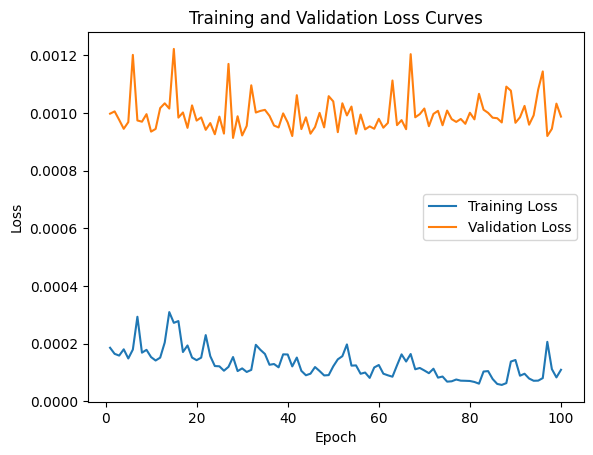

In [39]:
import matplotlib.pyplot as plt

# Training loop with loss and validation tracking
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            val_loss += criterion(outputs.squeeze(), targets).item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    # Print training and validation losses
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}, Validation Loss: {val_loss}")

# Plot loss curves
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()


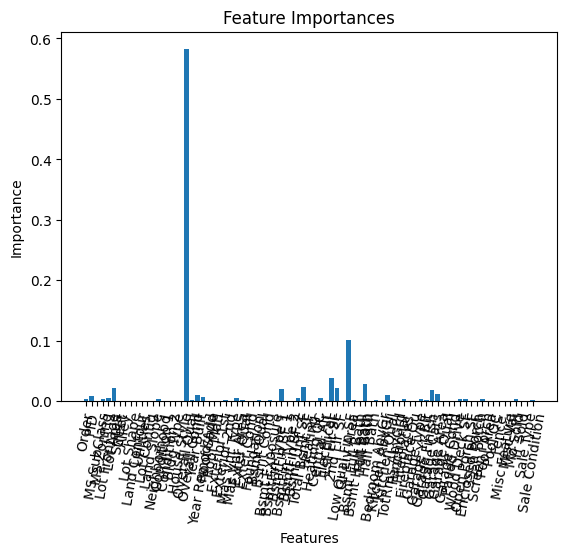

In [50]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Create and fit a RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Plot feature importances
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xticks(range(len(model.feature_importances_)), X_train.columns, rotation=80)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()


In [52]:
import torchvision.transforms as transforms
